In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam 

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
dataset = pd.read_csv('data.csv')
dataset.iloc[:,1] = LabelEncoder().fit_transform(dataset.iloc[:,1].values)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(dataset.iloc[:,2:31].values,
                                                    dataset.iloc[:,1].values,
                                                    test_size=0.25,
                                                    random_state=0)

In [4]:
# Spliting the data into 75% training and 25% test

X = dataset.iloc[:,2:31].values
Y = dataset.iloc[:,1].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0) # 75% Training 25% test

In [5]:
# Scaling the data

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print(x_train.shape,x_test.shape)

(426, 29) (143, 29)


In [6]:
# Reshaping the data for LSTM

x_train, x_test = x_train.reshape(426,29,1), x_test.reshape(143,29,1)
print(x_train.shape,x_test.shape)

(426, 29, 1) (143, 29, 1)


In [10]:
# define model

epochs = 50
model = keras.models.Sequential()

model.add(layers.LSTM(units = 50, return_sequences = True, input_shape = (29,1)))
model.add(layers.Dropout(0.2))

model.add(layers.LSTM(units = 50, return_sequences = True))
model.add(layers.Dropout(0.2))

model.add(layers.LSTM(units = 50, return_sequences = True))
model.add(layers.Dropout(0.2))

model.add(layers.LSTM(units = 50))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units = 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 29, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 29, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 29, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 29, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 29, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 29, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [11]:
# loss and optimizer

model.compile(optimizer=Adam(learning_rate=0.00005), loss= 'mean_squared_error', metrics=['accuracy'])

In [12]:
# Training the model

history= model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test,y_test),verbose=1)

Epoch 1/50
14/14 [==============================] - 6s 111ms/step - loss: 0.3500 - accuracy: 0.6268 - val_loss: 0.3311 - val_accuracy: 0.6294
Epoch 2/50
14/14 [==============================] - 0s 29ms/step - loss: 0.3239 - accuracy: 0.6268 - val_loss: 0.3028 - val_accuracy: 0.6294
Epoch 3/50
14/14 [==============================] - 0s 31ms/step - loss: 0.2984 - accuracy: 0.6268 - val_loss: 0.2697 - val_accuracy: 0.6294
Epoch 4/50
14/14 [==============================] - 0s 30ms/step - loss: 0.2654 - accuracy: 0.6315 - val_loss: 0.2302 - val_accuracy: 0.6503
Epoch 5/50
14/14 [==============================] - 0s 30ms/step - loss: 0.2228 - accuracy: 0.6690 - val_loss: 0.1862 - val_accuracy: 0.7273
Epoch 6/50
14/14 [==============================] - 0s 33ms/step - loss: 0.1849 - accuracy: 0.7277 - val_loss: 0.1448 - val_accuracy: 0.8112
Epoch 7/50
14/14 [==============================] - 0s 32ms/step - loss: 0.1493 - accuracy: 0.8005 - val_loss: 0.1227 - val_accuracy: 0.8392
Epoch 8/50
1

In [13]:
def plot_learningCurve(history, epoch):
  #Plot training & validation accuracy values 
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'], loc='upper left')
  plt.show()

  #Plot training and validation loss 
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'], loc='upper left')
  plt.show()

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

3/3 - 0s - loss: 0.0555 - accuracy: 0.9231 - 42ms/epoch - 14ms/step


[0.055478017777204514, 0.9230769276618958]

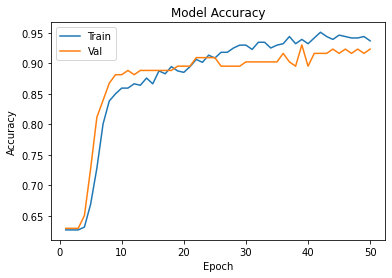

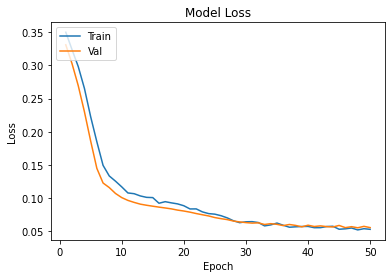

In [16]:
plot_learningCurve(history, epochs)